In [1]:
import numpy as np

In [9]:
data_EB_input = 'df_data_EB_test.h5'
data_EE_input = 'df_data_EE_test.h5'
mc_EB_input = 'df_mc_EB_test.h5'
mc_EE_input = 'df_mc_EE_test.h5'
data_EB_iso_input = 'df_data_EB_Iso_test.h5'
data_EE_iso_input = 'df_data_EE_Iso_test.h5'
mc_EB_iso_input = 'df_mc_EB_Iso_test.h5'
mc_EE_iso_input = 'df_mc_EE_Iso_test.h5'

ss = ['probeCovarianceIeIp','probeS4','probeR9','probePhiWidth','probeSigmaIeIe','probeEtaWidth']
ch = ['probeChIso03','probeChIso03worst']
ph = ['probePhoIso']
year = '2018'
workDir = '/work/gallim/dataframes/2018_flashgg_UNCORRECTED'

In [3]:
cols = ["mass","probeScEnergy","probeScEta","probePhi","run","weight",
        "weight_clf","rho","probeR9","probeSigmaIeIe","probePhiWidth",
        "probeEtaWidth","probeCovarianceIeIp","probeCovarianceIpIp",
        "probeS4","probePhoIso","probeChIso03","probeChIso03worst",
        "probeSigmaRR","probePt","tagPt","probePassEleVeto","tagScEta"]

# Plots

In [5]:
import matplotlib.pyplot as plt
import mplhep
import pandas as pd

In [6]:
plt.style.use(mplhep.style.CMS)

In [10]:
output_name_EB = 'MIX_df_mc_EB_test_corr_clf_5M'
output_name_EE = 'MIX_df_mc_EE_test_corr_clf_5M'

corr_EB = pd.read_hdf('{}/{}.h5'.format(workDir, output_name_EB))
corr_EE = pd.read_hdf('{}/{}.h5'.format(workDir, output_name_EE))

data_EB = pd.read_hdf('{}/{}'.format(workDir, data_EB_input))
data_EE = pd.read_hdf('{}/{}'.format(workDir, data_EE_input))

mc_EB = pd.read_hdf('{}/{}'.format(workDir, mc_EB_input))
mc_EE = pd.read_hdf('{}/{}'.format(workDir, mc_EE_input))

data_EB_iso = pd.read_hdf('{}/{}'.format(workDir, data_EB_iso_input))
data_EE_iso = pd.read_hdf('{}/{}'.format(workDir, data_EE_iso_input))

#mc_EB_iso = pd.read_hdf('{}/{}'.format(workDir, mc_EB_iso_input))
#mc_EE_iso = pd.read_hdf('{}/{}'.format(workDir, mc_EE_iso_input))

In [9]:
import plotting
from quantile_regression_chain.systematics import utils

In [18]:
reweight_cut = "abs(probeScEta)<1.4442 and tagPt>40 and probePt>20 and mass>80 and mass<100 and probePassEleVeto==0 and abs(tagScEta)<2.5"

In [19]:
%%time

corr_EB.loc[np.abs(corr_EB['probeScEta'])<1.4442,'weight_clf'] = utils.clf_reweight(
    corr_EB.query('abs(probeScEta)<1.4442'), data_EB_iso, n_jobs=10, cut=reweight_cut)

CPU times: user 57min 16s, sys: 4.82 s, total: 57min 21s
Wall time: 10min 52s


In [16]:
'newPhoID' in data_EB.columns

False

In [13]:
mc_EB.columns

Index(['probeScEta', 'probeEtaWidth', 'probeR9', 'weight', 'probeSigmaRR',
       'tagChIso03', 'probeChIso03', 'probeS4', 'tagR9', 'tagPhiWidth_Sc',
       'probePt', 'tagSigmaRR', 'probePhiWidth', 'probeChIso03worst',
       'puweight', 'tagEleMatch', 'tagPhi', 'probeScEnergy', 'nvtx',
       'probePhoIso', 'tagPhoIso', 'run', 'tagScEta', 'probeEleMatch',
       'probeCovarianceIeIp', 'tagPt', 'rho', 'tagS4', 'tagSigmaIeIe',
       'tagCovarianceIpIp', 'tagCovarianceIeIp', 'tagScEnergy',
       'tagChIso03worst', 'probeSigmaIeIe', 'probePhi', 'mass',
       'probeCovarianceIpIp', 'tagEtaWidth_Sc', 'probeHoE',
       'probeFull5x5_e1x5', 'probeFull5x5_e5x5', 'probeNeutIso',
       'probePassEleVeto'],
      dtype='object')

In [18]:
'newPhoID' in corr_EB.columns

True

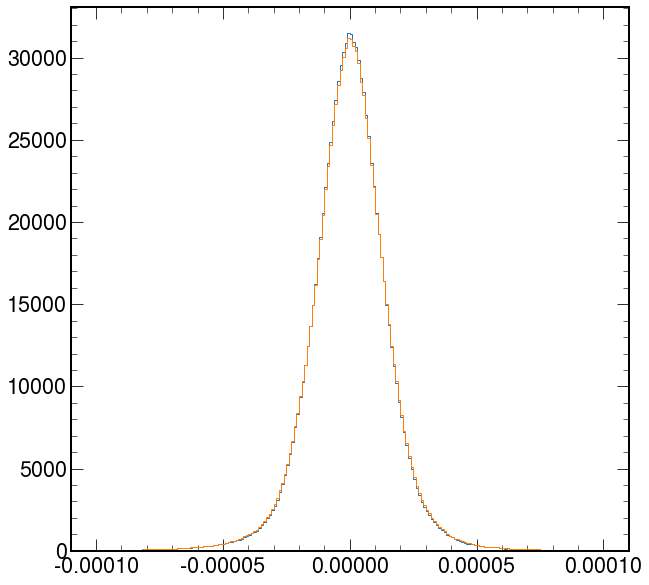

In [24]:
bins = 200
rg = [-0.0001, 0.0001]

plt.hist(corr_EB['probeCovarianceIeIp_corr'], weights=corr_EB['weight_clf'], bins=bins, range=rg, label='no weight', alpha=1.0, histtype='step', density=True)
plt.hist(corr_EB['probeCovarianceIeIp_corr'], bins=bins, range=rg, label='no weight', alpha=1.0, histtype='step', density=True)
plt.show()

In [11]:
def plot_contributions(data_df, trained_df, var, bins, rg, legend_location, legend_prop=None, logy=False, out_name=''):
    #data_kwargs = dict(alpha=0.0, histtype='step', edgecolor='black', weights=trained_df['weight_clf'], )
    #mc_uncorr_kwargs = dict(alpha=1.0, histtype='step', edgecolor='red', weights=trained_df['weight_clf'], )
    #mc_corr_kwargs = dict(alpha=1.0, histtype='step', edgecolor='blue', weights=trained_df['weight_clf'], )
    data_kwargs = dict(alpha=0.0, histtype='step', edgecolor='black', )
    mc_uncorr_kwargs = dict(alpha=1.0, histtype='step', edgecolor='red', )
    mc_corr_kwargs = dict(alpha=1.0, histtype='step', edgecolor='blue', )
    
    data_df = data_df.sample(len(trained_df))
    dcounts, dedges, patch = plt.hist(data_df[var], bins=bins, range=rg, label='{}_data'.format(var), **data_kwargs)
    dcentres = (dedges[:-1] + dedges[1:])/2.
    plt.plot(dcentres, dcounts, 'k.')
    #plt.hist(data_df[var], bins=bins, range=rg, label='{}_data'.format(var), **data_kwargs)
    plt.hist(trained_df[var], bins=bins, range=rg, label='{}_MC'.format(var), **mc_uncorr_kwargs)
    plt.hist(trained_df['{}_corr'.format(var)], bins=bins, range=rg, label='{}_MC_corr'.format(var), **mc_corr_kwargs)
    plt.legend(loc=legend_location, prop=legend_prop)
    if logy:
        plt.yscale('log')
    if out_name:
        plt.savefig('/work/gallim/plots/{}_{}.jpg'.format(var, out_name))
    plt.show()
    
def plot_both_contributions(data_dfs, trained_dfs, var, bins, rg, legend_location, legend_prop=None, logy=False, out_name=''):
    data_kwargs = dict(alpha=0.0, histtype='step', edgecolor='black', )
    mc_uncorr_kwargs = dict(alpha=1.0, histtype='step', edgecolor='red', )
    mc_corr_kwargs = dict(alpha=1.0, histtype='step', edgecolor='blue', )
    
    data_dfs = (data_dfs[0].sample(len(trained_dfs[0])), data_dfs[1].sample(len(trained_dfs[1])))
    dcounts, dedges, patch = plt.hist(pd.concat([data_dfs[0][var], data_dfs[1][var]], ignore_index=True), 
         bins=bins, range=rg, label='{}_data'.format(var), **data_kwargs)
    dcentres = (dedges[:-1] + dedges[1:])/2.
    plt.plot(dcentres, dcounts, 'k.')
    #plt.hist(pd.concat([data_dfs[0][var], data_dfs[1][var]], ignore_index=True), 
         #bins=bins, range=rg, label='{}_data'.format(var), **data_kwargs)
    plt.hist(pd.concat([trained_dfs[0][var], trained_dfs[1][var]], ignore_index=True), 
         bins=bins, range=rg, label='{}_MC'.format(var), **mc_uncorr_kwargs)
    plt.hist(pd.concat([trained_dfs[0]['{}_corr'.format(var)], trained_dfs[1]['{}_corr'.format(var)]], ignore_index=True), 
         bins=bins, range=rg, label='{}_MC_corr'.format(var), **mc_corr_kwargs)
    plt.legend(loc=legend_location, prop=legend_prop)
    if logy:
        plt.yscale('log')
    if out_name:
        plt.savefig('/work/gallim/plots/{}_{}.jpg'.format(var, out_name))
    plt.show()
    
def plot_phoid(data_df, mc_df, trained_df, bins, rg, legend_location, legend_prop=None, logy=False, out_name=''):
    data_kwargs = dict(alpha=0.0, histtype='step', edgecolor='black', density=True)
    mc_uncorr_kwargs = dict(alpha=1.0, histtype='step', edgecolor='red', density=True)
    mc_corr_kwargs = dict(alpha=1.0, histtype='step', edgecolor='blue', density=True)
    
    original_name = 'probePhoIdMVA'
    new_name = 'newPhoID'
    
    #data_df = data_df.sample(len(trained_df))
    dcounts, dedges, patch = plt.hist(data_df[original_name], bins=bins, range=rg, label='{}_data'.format(original_name), **data_kwargs)
    dcentres = (dedges[:-1] + dedges[1:])/2.
    plt.plot(dcentres, dcounts, 'k.')
    #plt.hist(data_df[var], bins=bins, range=rg, label='{}_data'.format(var), **data_kwargs)
    plt.hist(mc_df[original_name], bins=bins, range=rg, label='{}_MC'.format(original_name), **mc_uncorr_kwargs)
    plt.hist(trained_df[new_name], bins=bins, range=rg, label='{}_MC'.format(new_name), **mc_corr_kwargs)
    plt.legend(loc=legend_location, prop=legend_prop)
    if logy:
        plt.yscale('log')
    if out_name:
        plt.savefig('/work/gallim/plots/{}_{}.jpg'.format(original_name, out_name))
    plt.show()

# PhoID

In [21]:
import uproot

In [33]:
original_cut_EB = '(tagPt>40) & (tagR9>0.8) & (mass>80) & (mass<100) & (probeChIso03<6) & (tagScEta>-2.1) & (tagScEta<2.1) & (probePassEleVeto==0) & (probeSigmaIeIe<0.0105)'

In [34]:
%%time

file_mc = uproot.open('/work/gallim/root_files/tnp_merged_outputs/2018/UNCORRECTED_20201231/outputMC.root')
tree_mc = file_mc['tagAndProbeDumper/DYJetsToLL_amcatnloFXFX_13TeV_All']
original_mc = tree_mc.arrays(['probePhoIdMVA'], original_cut_EB, library='pd')

CPU times: user 4.61 s, sys: 738 ms, total: 5.35 s
Wall time: 5.33 s


In [35]:
%%time

file_data = uproot.open('/work/gallim/root_files/tnp_merged_outputs/2018/UNCORRECTED_20201231/outputData.root')
tree_data = file_data['tagAndProbeDumper/Data_13TeV_All']
original_data = tree_data.arrays(['probePhoIdMVA'], original_cut_EB, library='pd')

CPU times: user 7.99 s, sys: 539 ms, total: 8.53 s
Wall time: 8.49 s


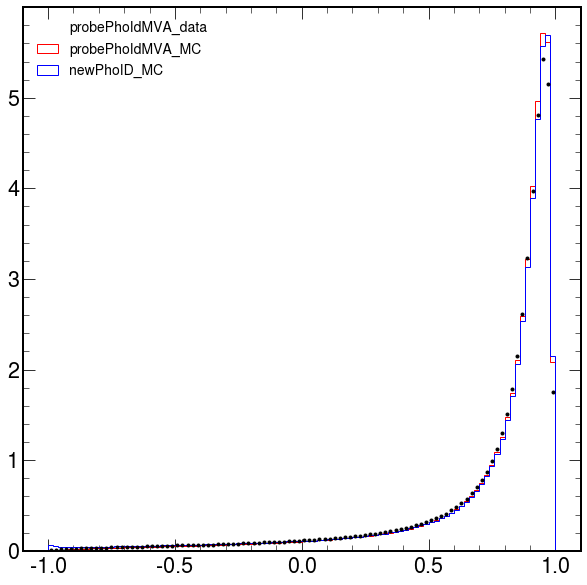

In [43]:
rg = [-1, 1]
bins = 100

plot_phoid(original_data, original_mc, corr_EB, bins, rg, 'upper left', {'size': 14}, out_name='EB')

# CovarianceIeIp

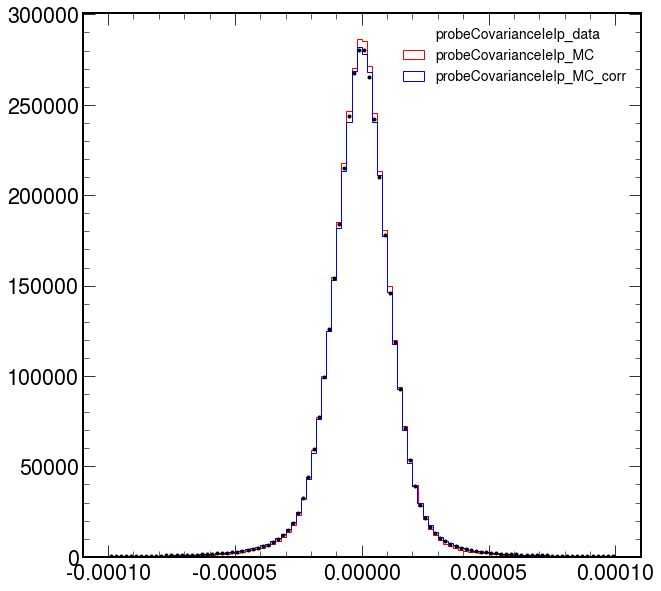

In [8]:
rg = [-0.0001, 0.0001]
#rg = [-0.0005, 0.0005]
bins = 100

plot_contributions(data_EB, corr_EB, 'probeCovarianceIeIp', bins, rg, 'upper right', {'size': 14})
#plot_contributions(data_EB, corr_EB, 'probeCovarianceIeIp', bins, rg, 'upper right', {'size': 14}, out_name='EB')

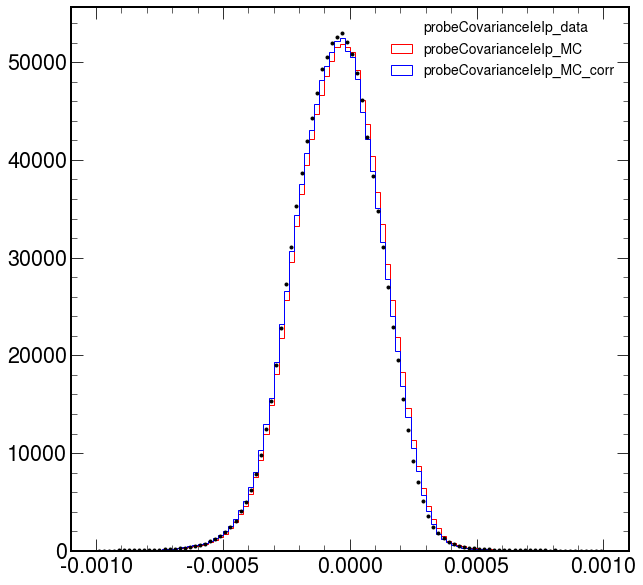

In [12]:
rg = [-0.001, 0.001]
bins = 100

plot_contributions(data_EE, corr_EE, 'probeCovarianceIeIp', bins, rg, 'upper right', {'size': 14}, out_name='EE')

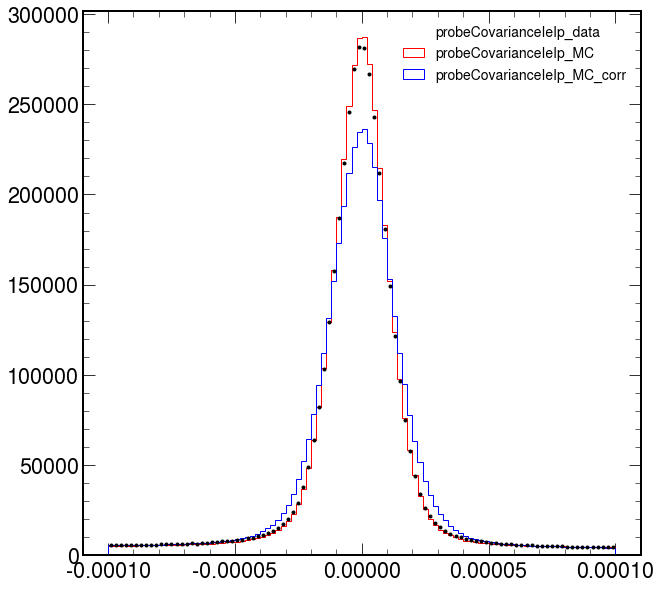

In [13]:
#rg = [-0.0004, 0.0003]
rg = [-0.0001, 0.0001]
bins = 100

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probeCovarianceIeIp', bins, rg, 'upper right', {'size': 14}, out_name='EBEE')

# S4

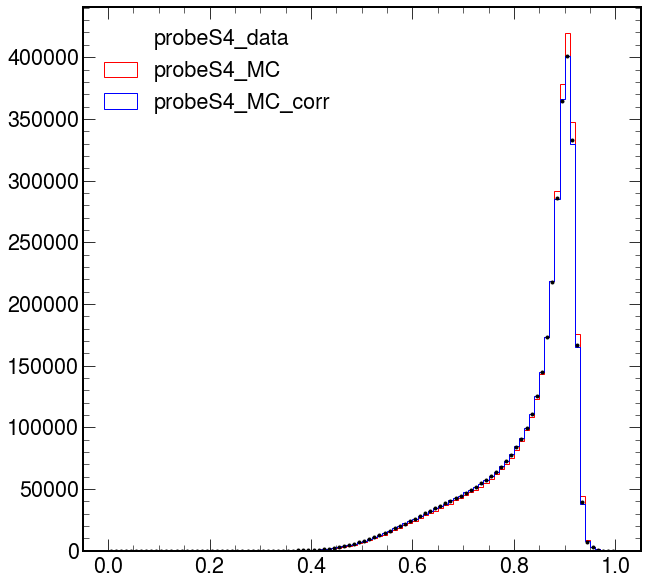

In [9]:
rg = [0., 1.]
bins = 100

plot_contributions(data_EB, corr_EB, 'probeS4', bins, rg, 'upper left')

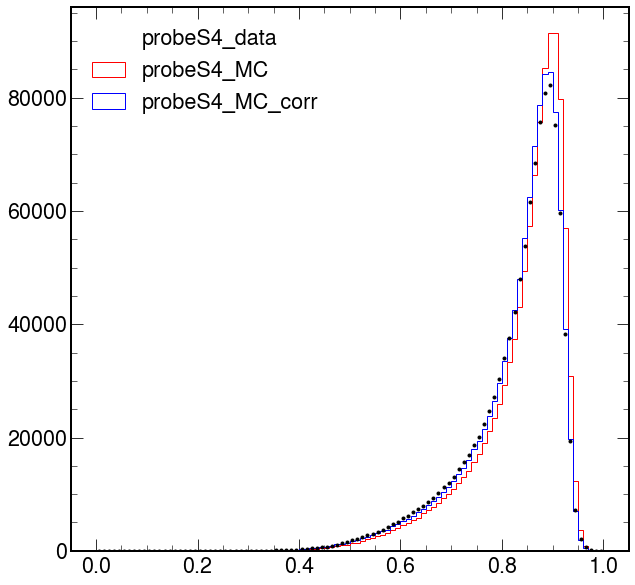

In [15]:
rg = [0., 1.]
bins = 100

plot_contributions(data_EE, corr_EE, 'probeS4', bins, rg, 'upper left', out_name='EE')

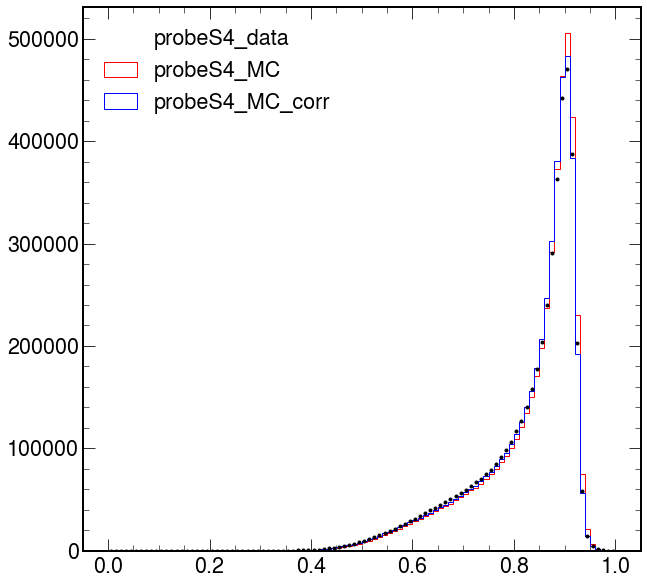

In [16]:
rg = [0., 1]
bins = 100

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probeS4', bins, rg, 'upper left', out_name='EBEE')

# R9

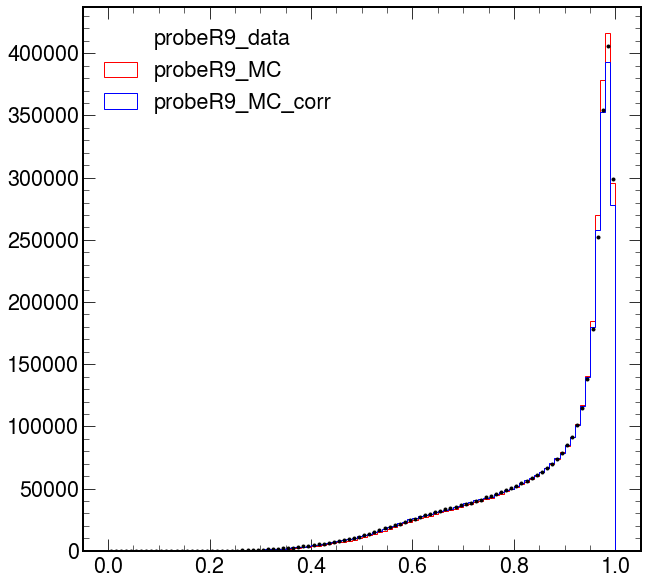

In [10]:
rg = [0., 1.]
bins = 100

plot_contributions(data_EB, corr_EB, 'probeR9', bins, rg, 'upper left', out_name='EB')

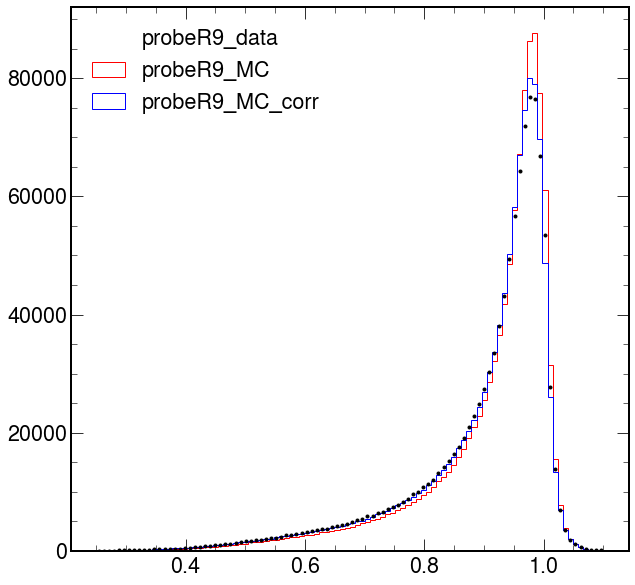

In [18]:
rg = [0.25, 1.1]
bins = 100

plot_contributions(data_EE, corr_EE, 'probeR9', bins, rg, 'upper left', out_name='EE')

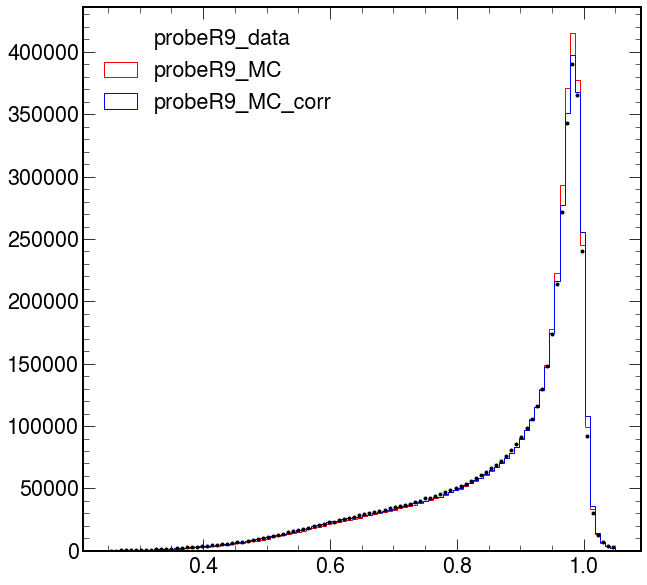

In [19]:
rg = [0.25, 1.05]
bins = 100

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probeR9', bins, rg, 'upper left', out_name='EBEE')

# PhiWidth

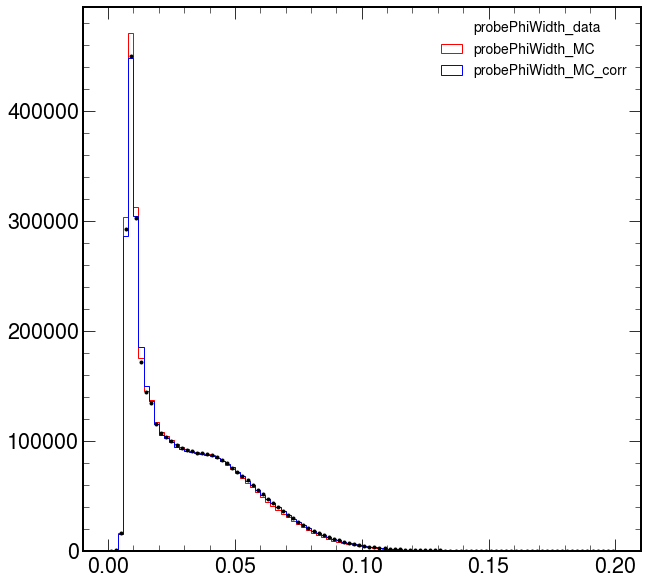

In [12]:
rg = [0, 0.2]
bins = 100

plot_contributions(data_EB, corr_EB, 'probePhiWidth', bins, rg, 'upper right', {'size': 14})

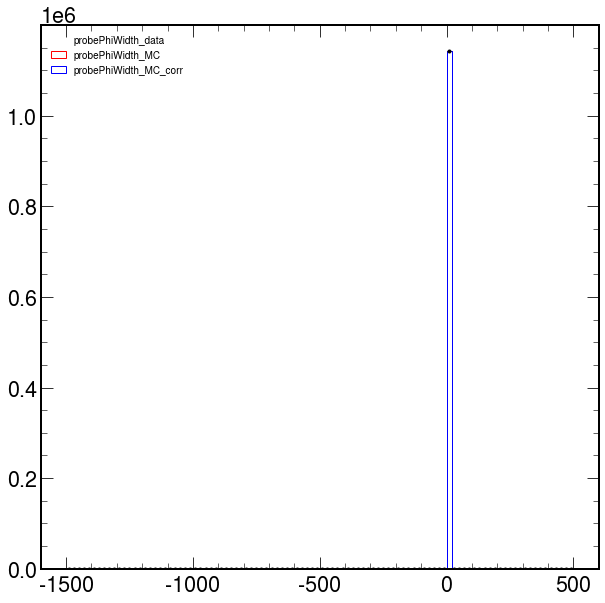

In [13]:
rg = [-1500, 500]
bins = 100

plot_contributions(data_EE, corr_EE, 'probePhiWidth', bins, rg, 'upper left', {'size': 10})

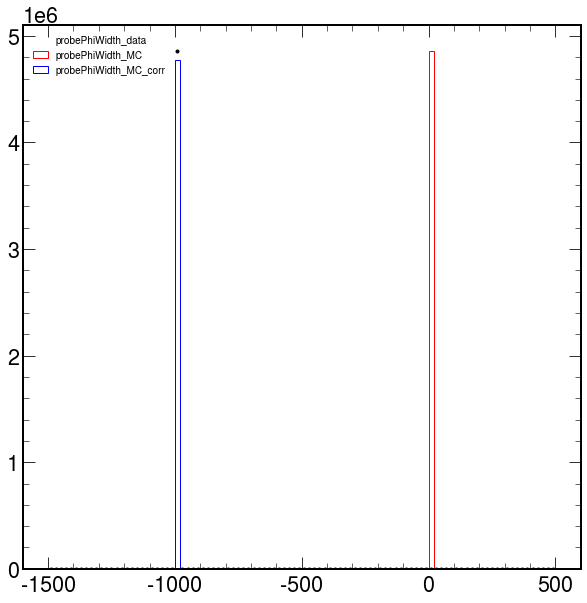

In [22]:
bins = 100

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probePhiWidth', bins, rg, 'upper left', {'size': 10}, out_name='EBEE')

# SigmaIeIe

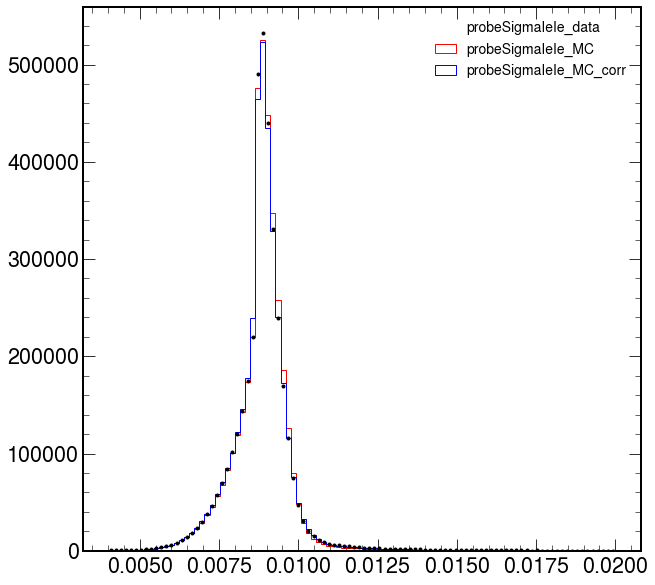

In [12]:
bins = 100
#rg = [0.004, 0.032]
rg = [0.004, 0.02]

plot_contributions(data_EB, corr_EB, 'probeSigmaIeIe', bins, rg, 'upper right', {'size': 14}, out_name='EB')

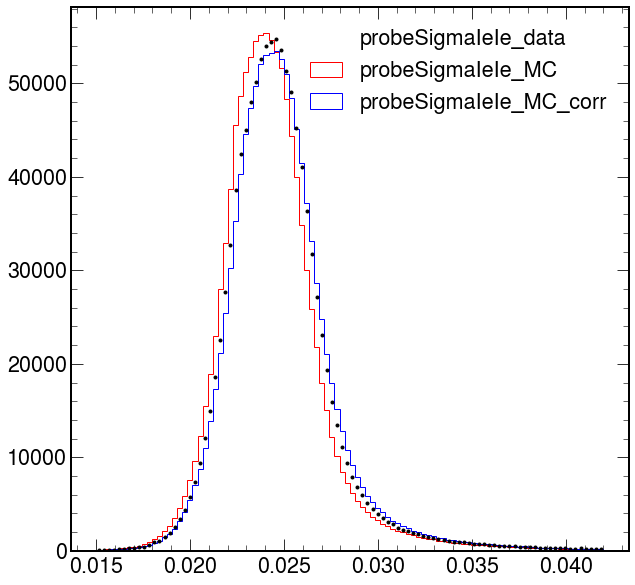

In [27]:
bins = 100
rg = [0.015, 0.042]

plot_contributions(data_EE, corr_EE, 'probeSigmaIeIe', bins, rg, 'upper right', out_name='EE')

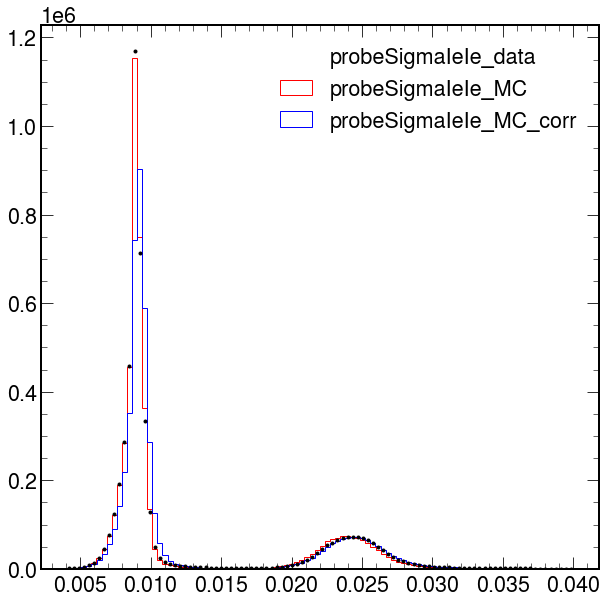

In [29]:
bins = 100
rg = [0.004, 0.04]
#rg = [0., 0.05]

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probeSigmaIeIe', bins, rg, 'upper right', out_name='EBEE')

# EtaWidth

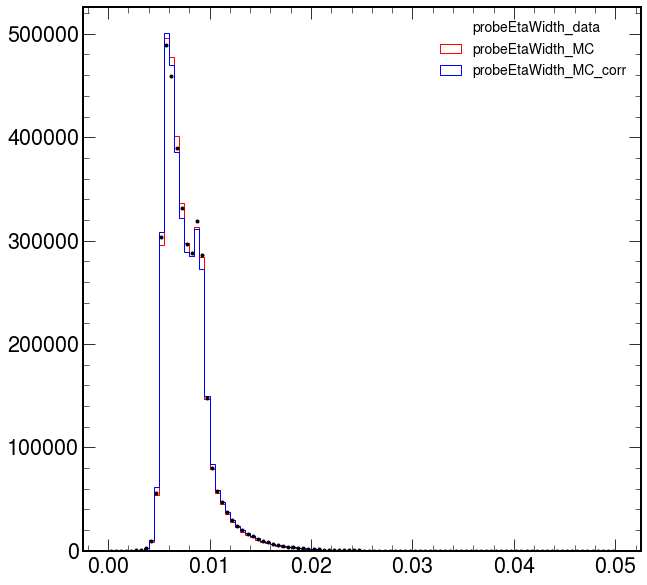

In [35]:
bins = 100
rg = [0, 0.05]

plot_contributions(data_EB, corr_EB, 'probeEtaWidth', bins, rg, 'upper right', {'size': 14}, out_name='EB')

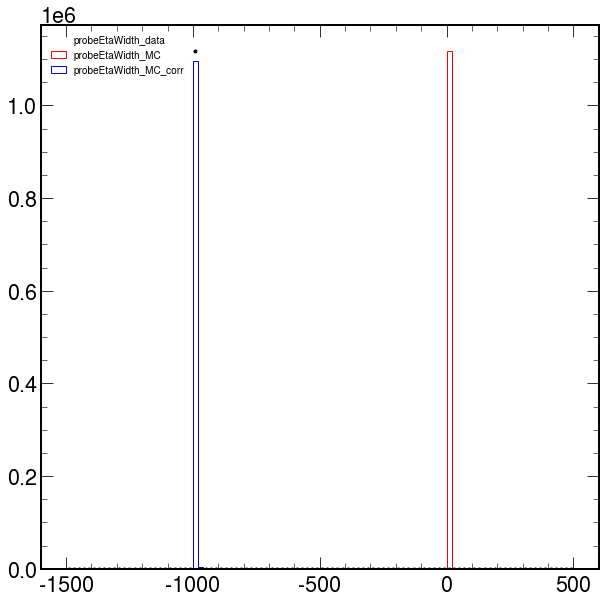

In [31]:
bins = 100
rg = [-1500, 500]

plot_contributions(data_EE, corr_EE, 'probeEtaWidth', bins, rg, 'upper left', {'size': 10}, out_name='EE')

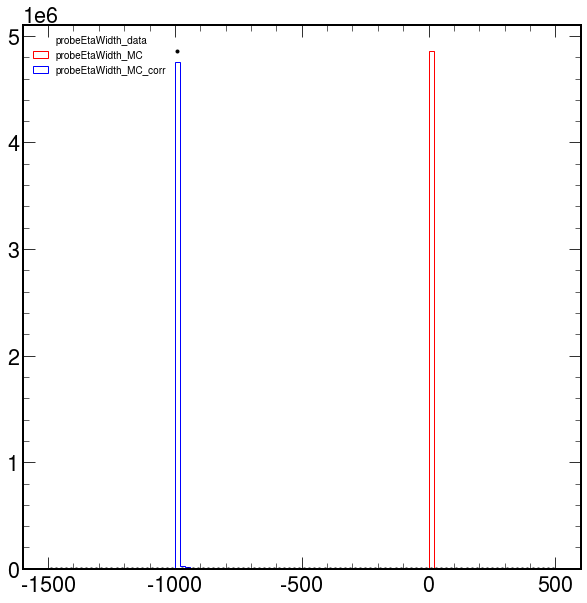

In [32]:
bins = 100
rg = [-1500, 500]

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probeEtaWidth', bins, rg, 'upper left', {'size': 10}, out_name='EBEE')

# ChIso03

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


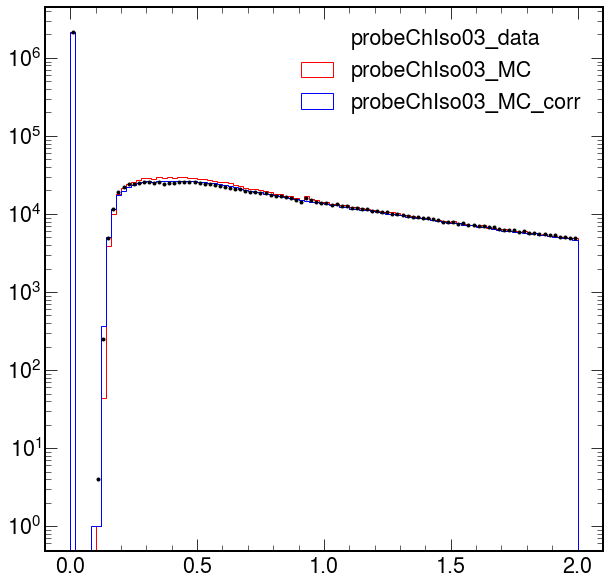

In [33]:
bins = 100
rg = [0., 2.0]

plot_contributions(data_EB_iso, corr_EB, 'probeChIso03', bins, rg, 'upper right', logy=True, out_name='EB')

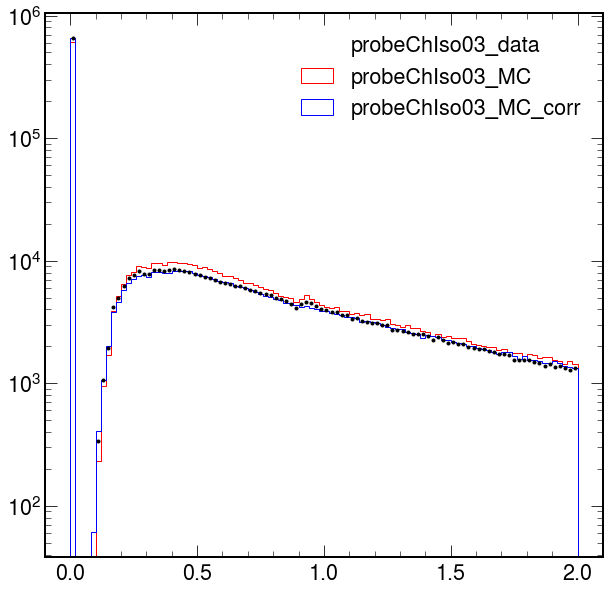

In [34]:
bins = 100
rg = [0., 2.]

plot_contributions(data_EE_iso, corr_EE, 'probeChIso03', bins, rg, 'upper right', logy=True, out_name='EE')

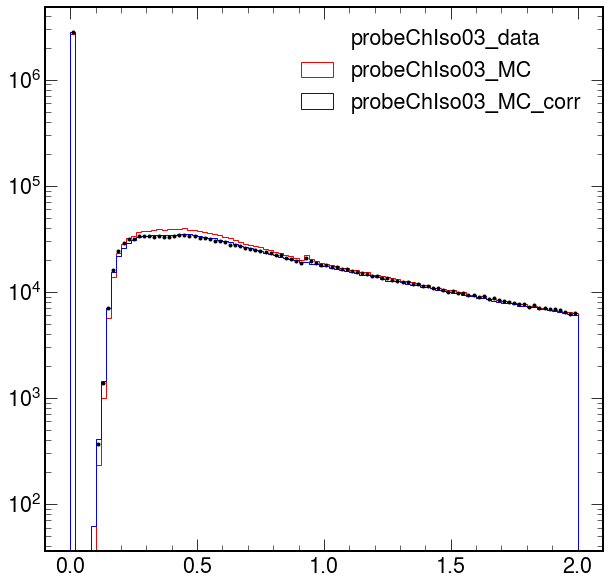

In [35]:
bins = 100
rg = [0., 2.]

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probeChIso03', bins, rg, 'upper right', logy=True, out_name='EBEE')

# ChIso03worst

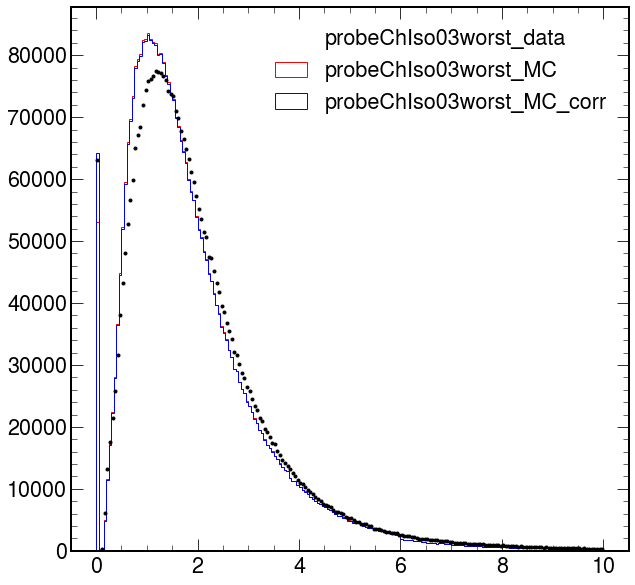

In [20]:
bins = 200
rg = [0, 10]

plot_contributions(data_EB_iso, corr_EB, 'probeChIso03worst', bins, rg, 'upper right')

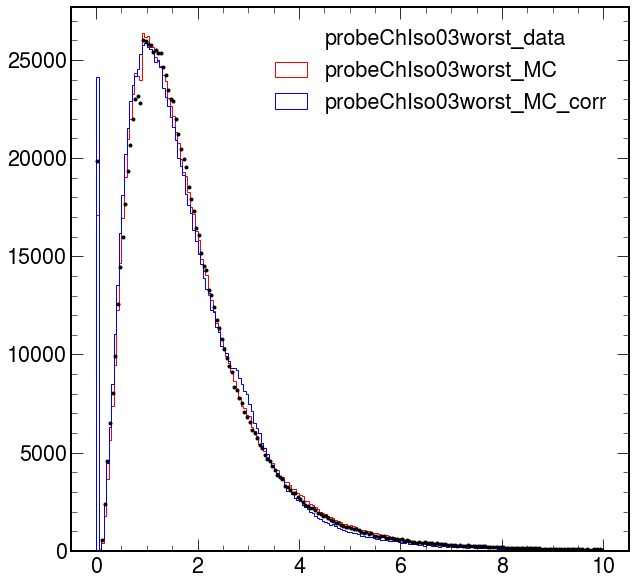

In [37]:
bins = 200
rg = [0., 10]

plot_contributions(data_EE_iso, corr_EE, 'probeChIso03worst', bins, rg, 'upper right', out_name='EE')

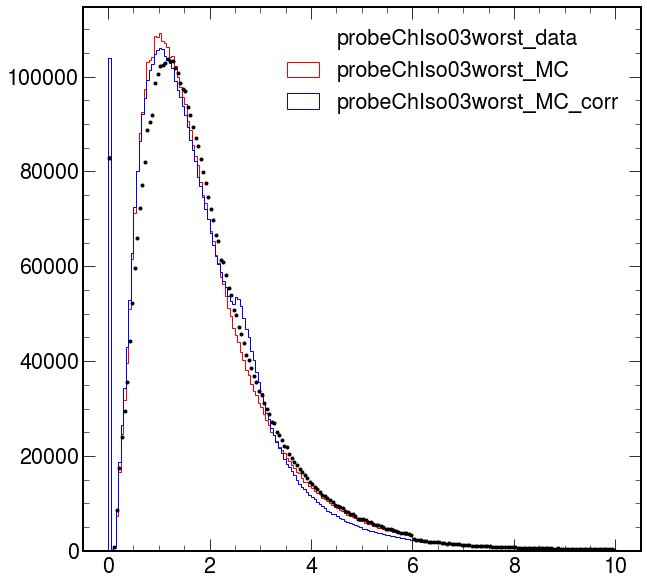

In [38]:
bins = 200
rg = [0., 10]

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probeChIso03worst', bins, rg, 'upper right', out_name='EBEE')

# PhoIso

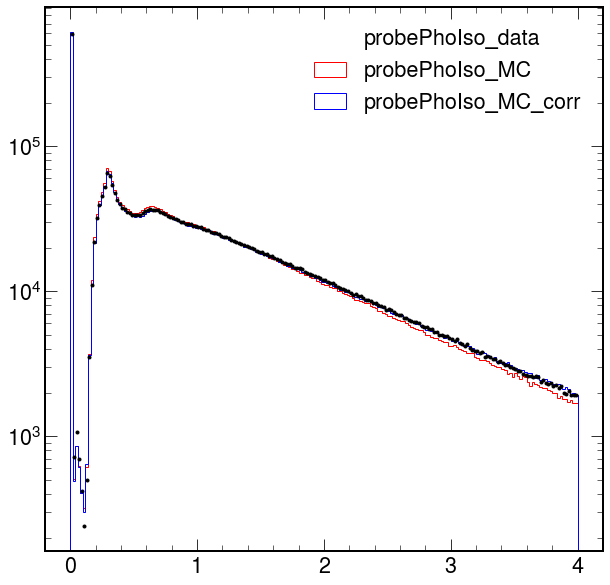

In [39]:
bins = 200
rg = [0, 4]

plot_contributions(data_EB_iso, corr_EB, 'probePhoIso', bins, rg, 'upper right', logy=True, out_name='EB')

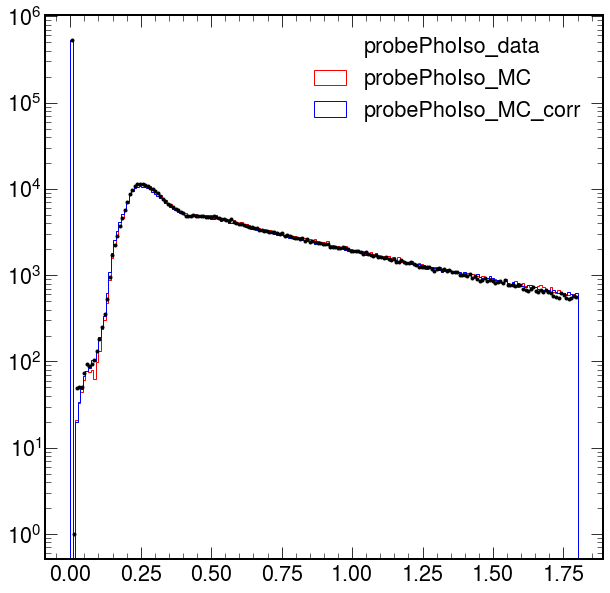

In [40]:
bins = 200
rg = [0, 1.8]

plot_contributions(data_EE_iso, corr_EE, 'probePhoIso', bins, rg, 'upper right', logy=True, out_name='EE')

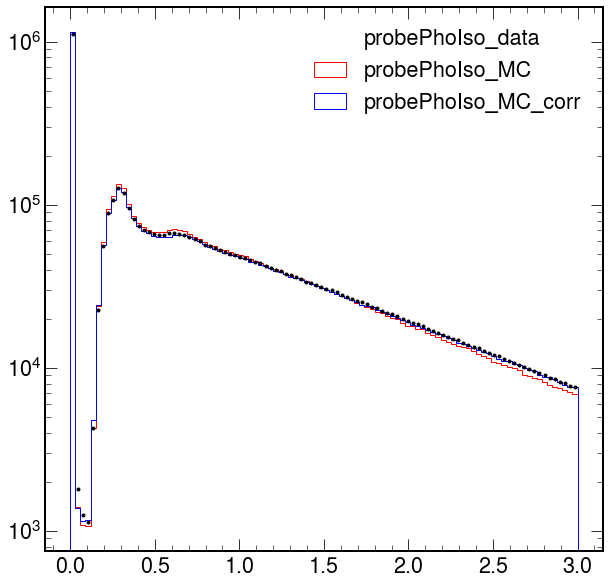

In [41]:
bins = 100
rg = [0, 3]

plot_both_contributions((data_EB, data_EE), (corr_EB, corr_EE), 'probePhoIso', bins, rg, 'upper right', logy=True, out_name='EBEE')